# CISC 451 Competition 1: Data Understanding
### Planning Bus Routes for the City of Kingston


This notebook uses data gathered from the City of Kingston's [data catalogue](https://www.cityofkingston.ca/explore/data-catalogue) to answer the following questions:

1. Is the bus service accessible to everyone in Kingston (walk, bike, park & ride to a bus stop)?
2. Are there some redundant bus routes that can be cancelled?
3. Assuming that each driveway has two cars and that all people work in downtown Kingston, how many new
bus routes are needed to make people leave their cars at home? How much would that reduce the gas
emissions?

Is there anything else you find interesting in the data that can help planning the bus routes?



## Part1: Exploratory Data Analysis(EDA)

In [64]:
%cd "C:\Users\mcunningham\Documents\Graduate School\CISC 451\Competition 1"
import numpy as np
import pandas as pd
import missingno as msno
%matplotlib inline

C:\Users\mcunningham\Documents\Graduate School\CISC 451\Competition 1


### Exploring missing values from datasets

First, datasets are read into pandas dataframes from csv files.

**Kingston Passenger Transit Data - October 2018**

In [65]:
cycling_facilities_data = pd.read_csv("datasets\\cycling-facilities.csv", ';')
print(df.shape)
cycling_facilities_data.head()

(66562, 17)


,CYCLE_STATUS,CYCLE_TYPE,CONSTRUCTION_STATUS,CONSTRUCTION_TYPE,CYCLE_WIDTH,GeoJSON,geo_point_2d
0,Route,NaN,Approved for Construction,Joint Reconstruction,NaN,"{""type"": ""LineString"", ""coordinates"": [[-76.49...","44.2345280805,-76.4933156096"
1,Bike Lane,NaN,Approved for Construction,Development Charge Project,NaN,"{""type"": ""LineString"", ""coordinates"": [[-76.46...","44.2542237346,-76.4604695819"
2,Bike Lane,NaN,Approved for Construction,Carryover Project,NaN,"{""type"": ""LineString"", ""coordinates"": [[-76.46...","44.2629751913,-76.45768702"
3,Route,NaN,Approved for Construction,Carryover Project,NaN,"{""type"": ""LineString"", ""coordinates"": [[-76.43...","44.2939115061,-76.4407443611"
4,Route,NaN,Approved for Construction,Cycling Lanes,NaN,"{""type"": ""LineString"", ""coordinates"": [[-76.49...","44.2277074034,-76.4924229667"


Get a count of missing values in each column.

In [66]:
cycling_facilities_data.isna().sum()

CYCLE_STATUS             1
CYCLE_TYPE             352
CONSTRUCTION_STATUS      1
CONSTRUCTION_TYPE      391
CYCLE_WIDTH            657
GeoJSON                  0
geo_point_2d             0
dtype: int64

Display the number of non-null values in a bar chart.

<AxesSubplot:>

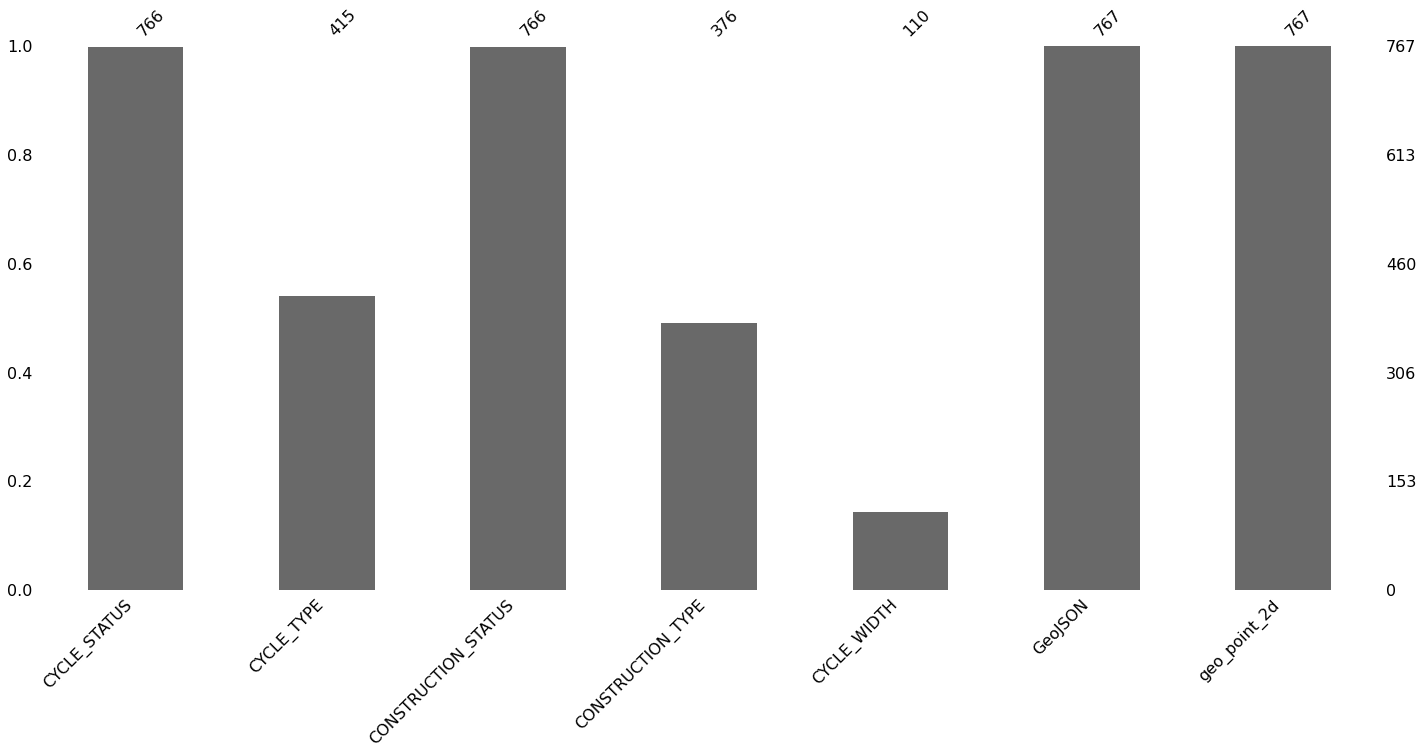

In [67]:
msno.bar(cycling_facilities_data)

Display mising values in a matrix visual (white represents missing values).

<AxesSubplot:>

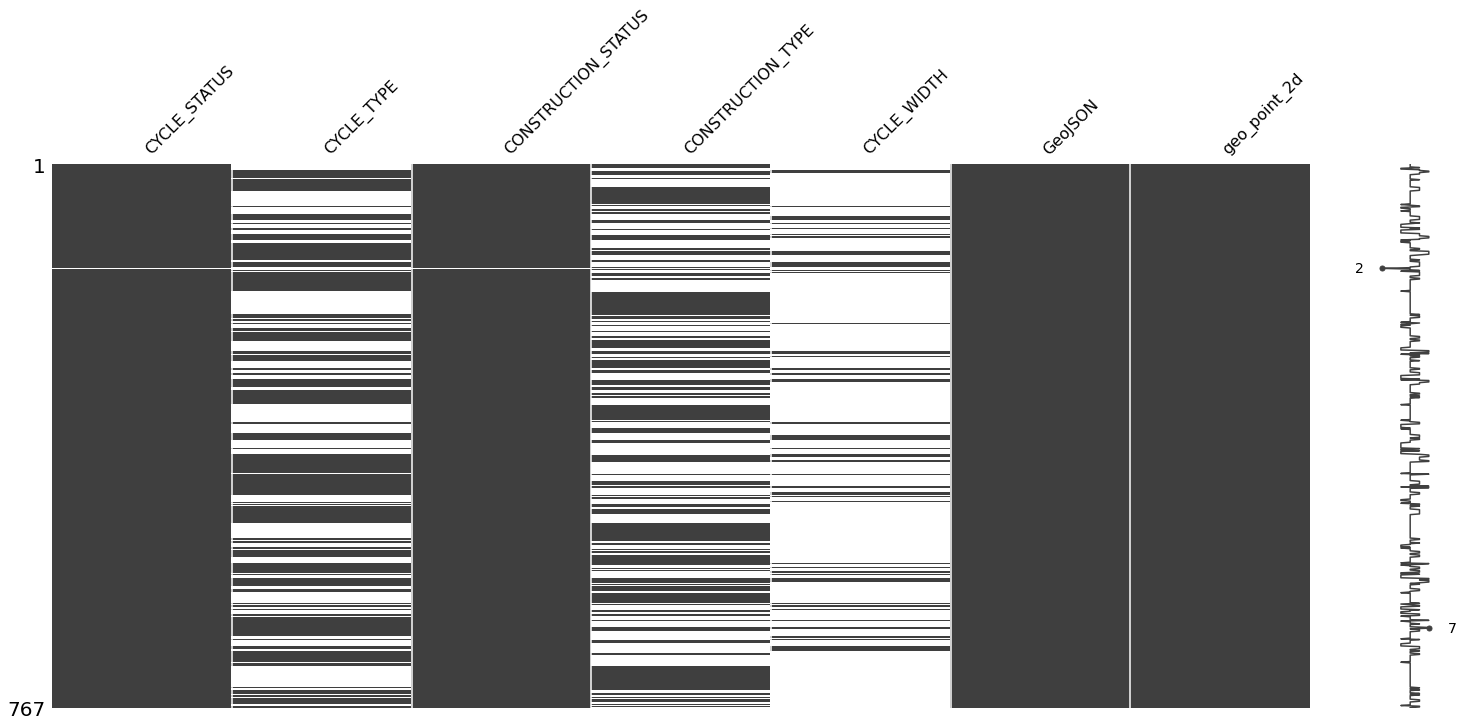

In [68]:
msno.matrix(cycling_facilities_data)

Analyze the correlation between missing values in different columns using a correlation heatmap.

<AxesSubplot:>

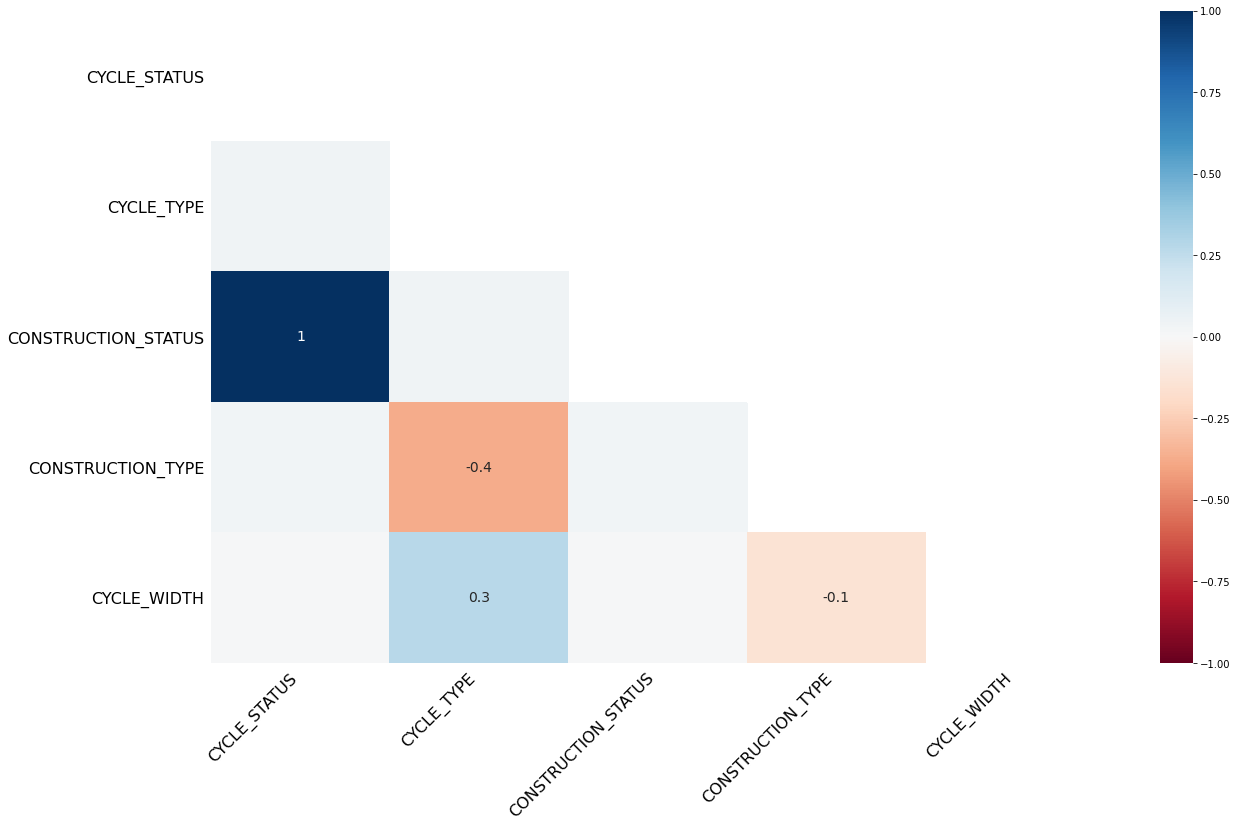

In [69]:
msno.heatmap(cycling_facilities_data)

**Civic Addresses**

In [70]:
address_data = pd.read_csv("datasets\\civic-addresses.csv", ';')
print(df.shape)
address_data.head()

(66562, 17)


,ADDRESS_NUMBER,STREET_BODY_NAME,STREET_TYPE_SUFFIX,DIRECTION_SUFFIX,ADDRESS_NUMBER_SUFFIX,"﻿""MUNICIPALITY""",UNIT_TYPE,UNIT,STREET,GARBAGE_DAY,ELECTORAL_DISTRICT_NAME,NEIGHBOURHOOD,RECYCLING_DAY,POSTAL_CODE,ADDRESS_ID,GeoJSON,geo_point_2d
0,175,ROSEMUND,CRES,NaN,NaN,KINGSTON,BASE,NaN,ROSEMUND CRES,Friday,Meadowbrook-Strathcona,Strathcona Park,Friday,K7M 6Z2,20179,"{""type"": ""Point"", ""coordinates"": [-76.52180734...","44.2579117341,-76.5218073417"
1,40,ROCKFORD,PL,NaN,NaN,KINGSTON,BASE,NaN,ROCKFORD PL,Friday,Kingscourt-Rideau,Kingscourt,Friday,K7K 5Z8,20311,"{""type"": ""Point"", ""coordinates"": [-76.50159061...","44.2575949054,-76.5015906164"
2,2524,BATTERSEA,RD,NaN,NaN,KINGSTON,BASE,NaN,BATTERSEA RD,Thursday,Countryside,Glenburnie,Thursday,K0H 1S0,27072,"{""type"": ""Point"", ""coordinates"": [-76.45555556...","44.332601866,-76.4555555656"
3,216,VICTORIA,ST,NaN,NaN,KINGSTON,BASE,NaN,VICTORIA ST,Wednesday,Sydenham,Sunnyside,Wednesday,K7L 3Y8,11392,"{""type"": ""Point"", ""coordinates"": [-76.50282341...","44.2280064032,-76.5028234134"
4,15,EVELYN,ST,NaN,NaN,KINGSTON,BASE,NaN,EVELYN ST,Monday,Lakeside,Henderson,Monday,K7M 4R6,5473,"{""type"": ""Point"", ""coordinates"": [-76.57057827...","44.221080901,-76.5705782759"


In [71]:
address_data.isna().sum()

ADDRESS_NUMBER                 0
STREET_BODY_NAME               0
STREET_TYPE_SUFFIX           529
DIRECTION_SUFFIX           65486
ADDRESS_NUMBER_SUFFIX      66199
﻿"MUNICIPALITY"                0
UNIT_TYPE                      0
UNIT                       44780
STREET                         0
GARBAGE_DAY                    2
ELECTORAL_DISTRICT_NAME        2
NEIGHBOURHOOD                  0
RECYCLING_DAY                  1
POSTAL_CODE                  362
ADDRESS_ID                     0
GeoJSON                        0
geo_point_2d                   0
dtype: int64

<AxesSubplot:>

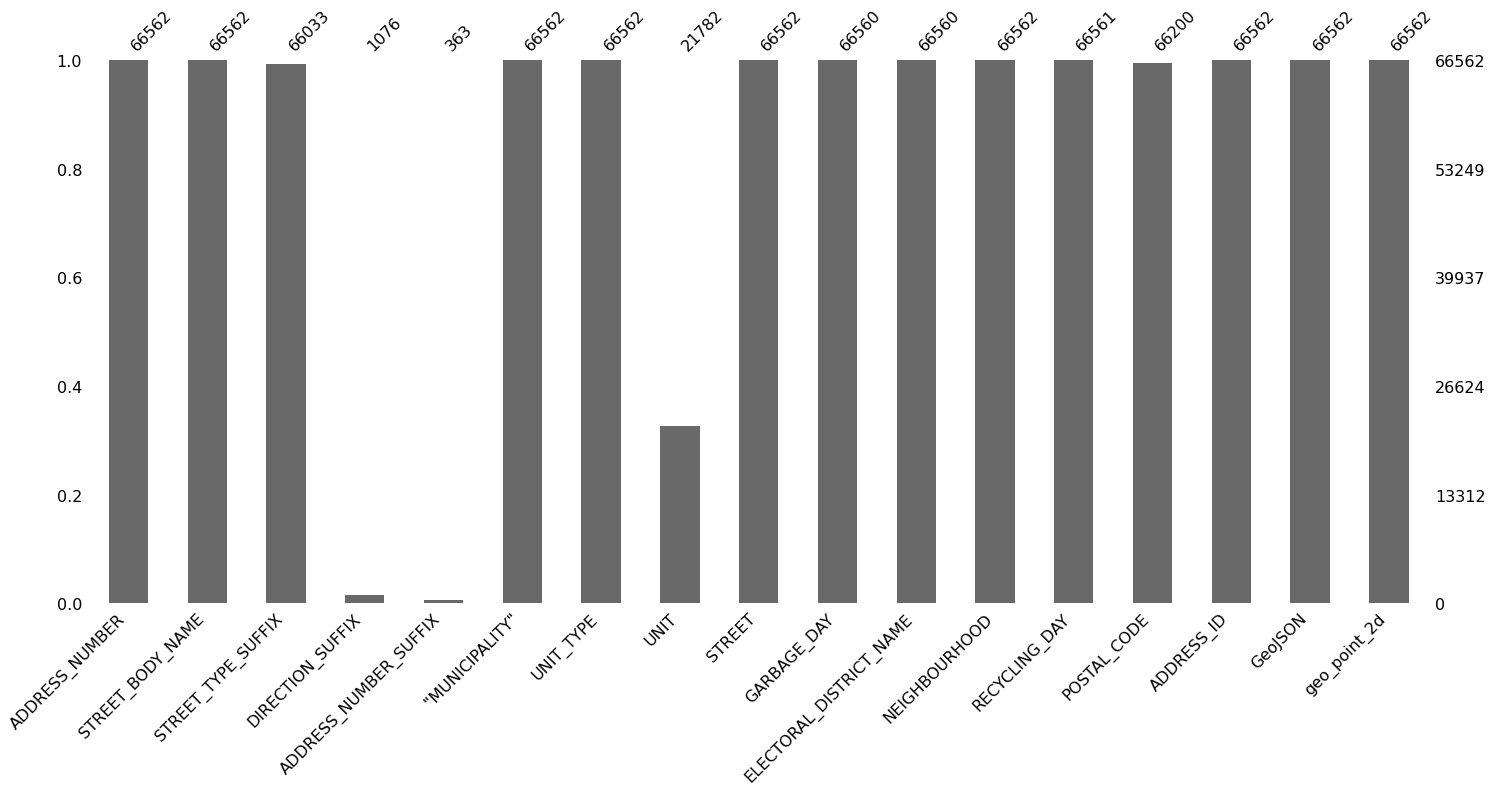

In [72]:
msno.bar(address_data)

<AxesSubplot:>

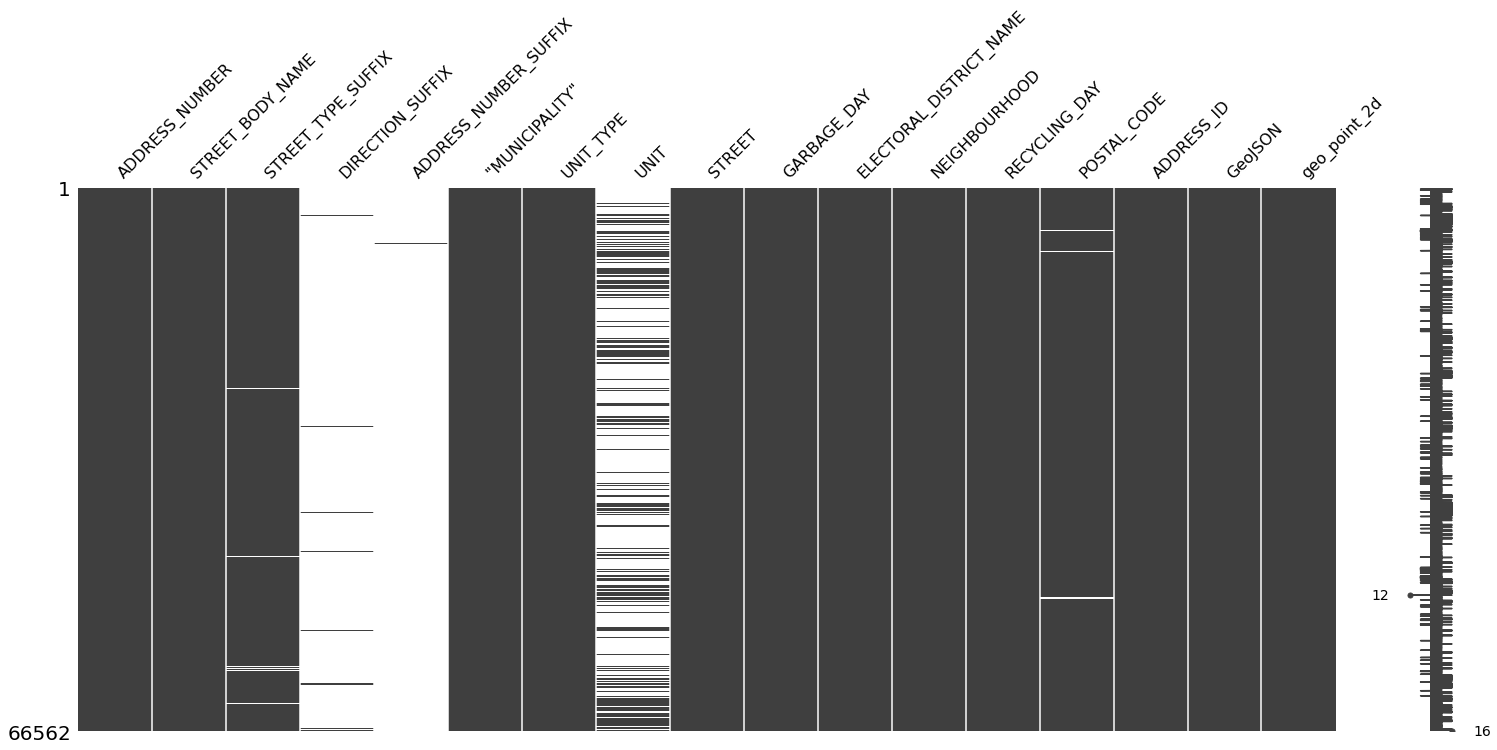

In [73]:
msno.matrix(address_data)

<AxesSubplot:>

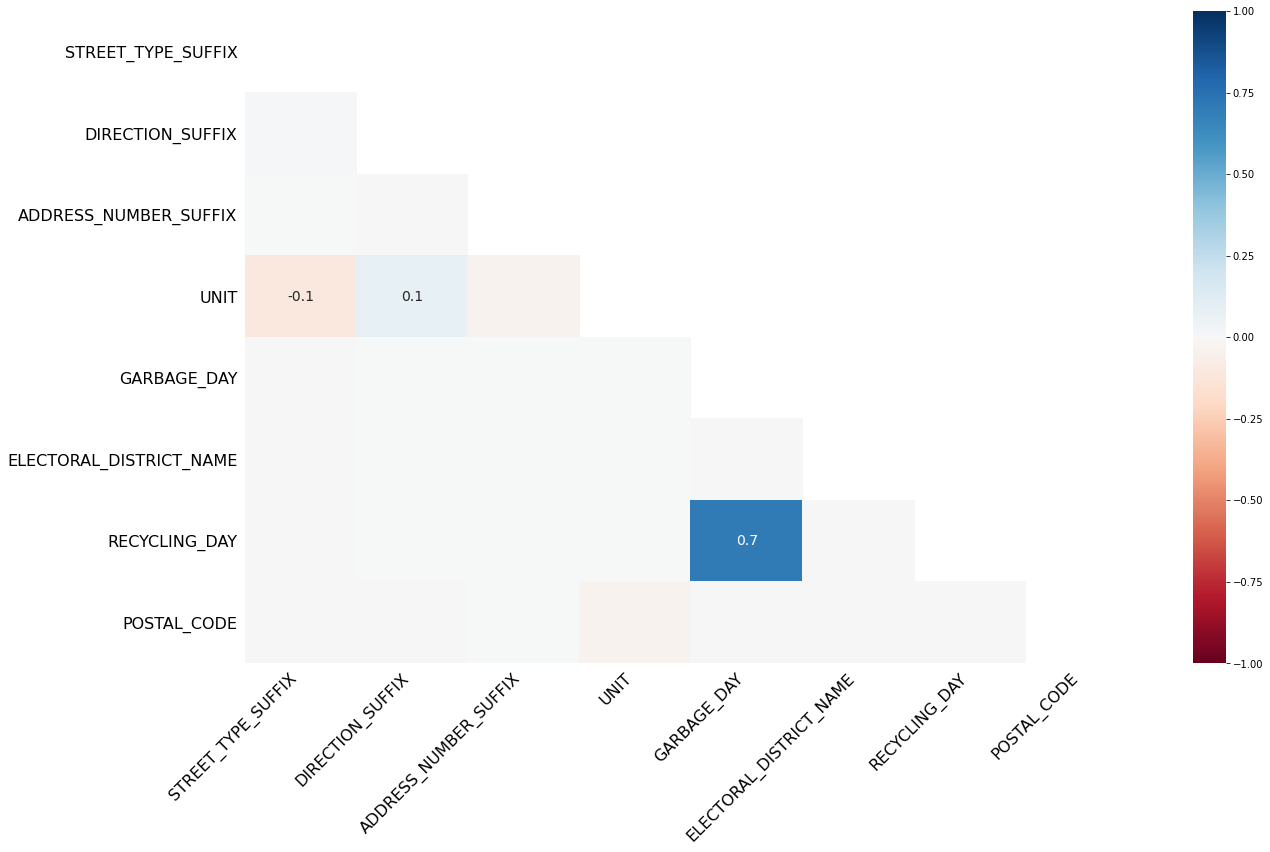

In [74]:
msno.heatmap(address_data)